<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-100/blob/main/Employee_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load libraries
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline = False, world_readable = True)

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Employee%20Attrition.csv')
#copy the data to another df
empdf = data.copy()

In [ ]:
#look over shape of data
empdf.shape

(1470, 35)

In [ ]:
#look at sample of data
empdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
#let's see what data types how many features we are having
empdf.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [ ]:
empdf['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
#fig = go.Figure(figsize=(4,5))
#trace = go.Pie(labels=empdf['Attrition'], values=empdf['Attrition'].value_counts())
#iplot([trace])

In [ ]:
# let's see the total Missing values in dataset
empdf.isnull().sum().sum()

0

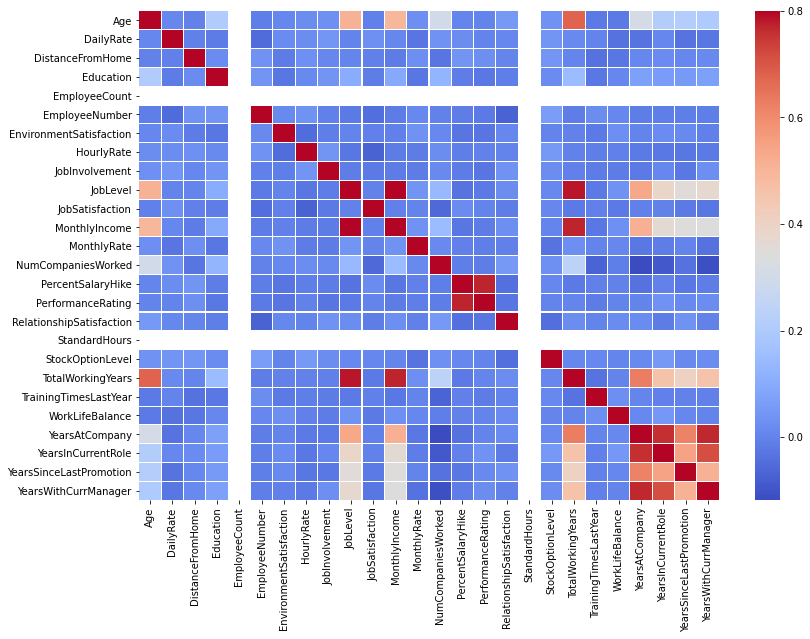

In [ ]:
plt.figure(figsize=(13,9))
sns.heatmap(empdf.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

# EDA

### Univariate and Bivariate Analysis
**Categorical Features**

In [ ]:
categorical_features = empdf.select_dtypes(include=[np.object]).columns
print("total categorical_features",len(categorical_features))

total categorical_features 9


In [ ]:
empdf[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
# Business Travel
empdf['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

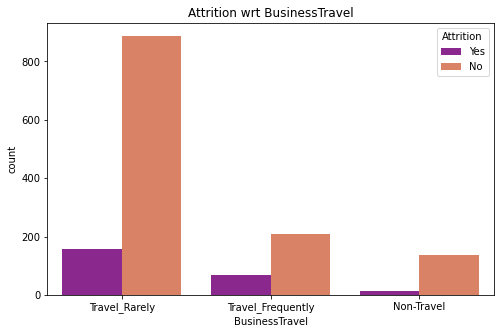

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='BusinessTravel',hue='Attrition', data=empdf, palette='plasma')
plt.title("Attrition wrt BusinessTravel")
plt.show()

In [ ]:
#Department
empdf['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

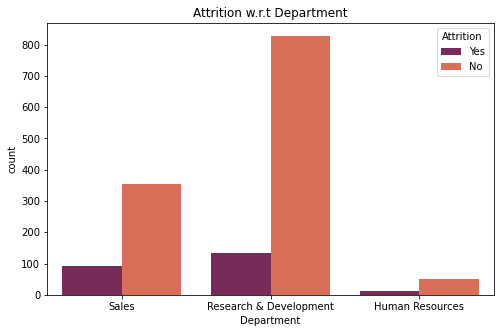

In [ ]:
# Department wrt Attrition
plt.figure(figsize=(8,5))
sns.countplot(x='Department',hue='Attrition', data=empdf, palette='rocket')
plt.title("Attrition w.r.t Department")
plt.show()

In [ ]:
#EducationField
empdf['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

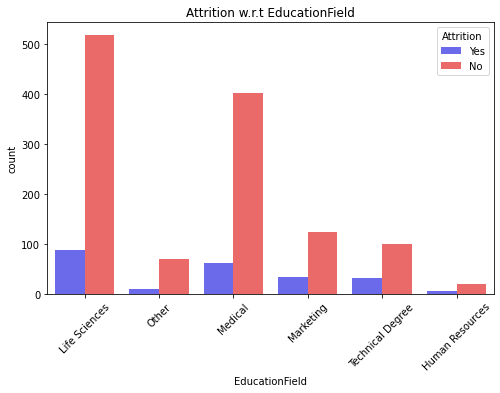

In [ ]:
# Department wrt Attrition
plt.figure(figsize=(8,5))
sns.countplot(x='EducationField',hue='Attrition', data=empdf, palette='seismic')
plt.title("Attrition w.r.t EducationField")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Gender
empdf['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

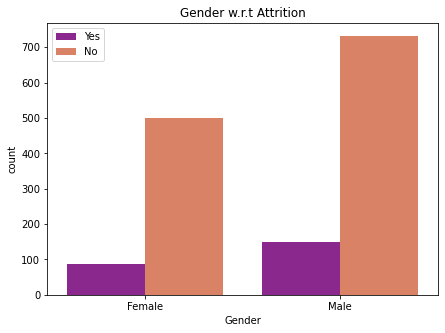

In [ ]:
# most male of female employes Attriate
# Department wrt Attrition
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',hue='Attrition', data=empdf, palette='plasma')
plt.title("Gender w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [ ]:
# let's also see, how any male and female are Married
pd.crosstab(empdf['MaritalStatus'],empdf['Gender'])

Gender,Female,Male
MaritalStatus,,
Divorced,117,210
Married,272,401
Single,199,271


In [ ]:
#JobRole
empdf['JobRole'].nunique()

9

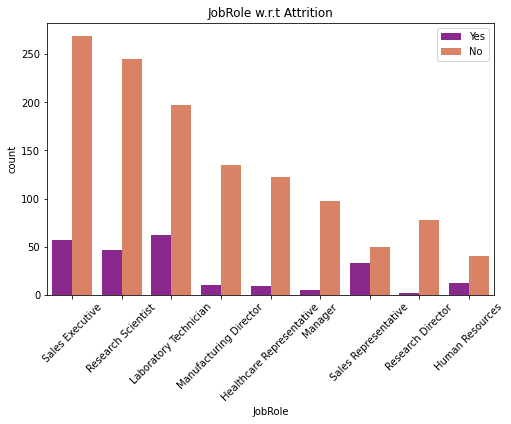

In [ ]:
# let's see at which post most people are leaving the jobs
# JobRole
plt.figure(figsize=(8,5))
sns.countplot(x='JobRole',hue='Attrition', data=empdf, palette='plasma')
plt.title("JobRole w.r.t Attrition")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#OverTime
empdf['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

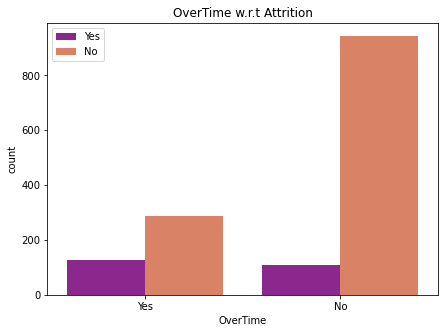

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='OverTime',hue='Attrition', data=empdf, palette='plasma')
plt.title("OverTime w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [ ]:
# how many male and female do overTime
pd.crosstab(empdf['OverTime'], empdf['Gender'])

Gender,Female,Male
OverTime,,
No,408,646
Yes,180,236


**Numerical Features**

In [ ]:
numerical_features = [feature for feature in empdf.columns if empdf[feature].dtype != 'O']
print("Total numerical_features", len(numerical_features))

Total numerical_features 26


In [ ]:
empdf[numerical_features].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


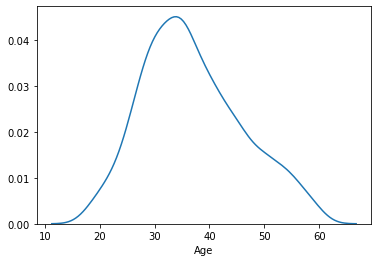

In [ ]:
# distribution of age
sns.distplot(empdf['Age'],hist=False)
plt.show()

In [ ]:
empdf['Age'].nunique()

43

* Age column is very well normalized, most of employees are age between 25 to 40.
- we are having some of the numerical columns which are lebel encoded for us, they are ordinal labels, so let's have a look at them first

In [ ]:
ordinal_features = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                    'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
empdf[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


In [ ]:
# Education
empdf['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

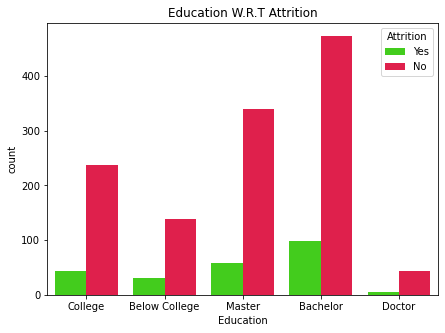

In [ ]:
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(7,5))
sns.countplot(x=empdf['Education'].map(edu_map), hue='Attrition', data=empdf, palette='prism')
plt.title("Education W.R.T Attrition")
plt.show()

In [ ]:
#EnvironmentSatisfaction
empdf['EnvironmentSatisfaction'].value_counts()   # it is very nice response from employees

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [ ]:
#JobInvolvement
empdf['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [ ]:
numerical_features = [feature for feature in empdf.columns if empdf[feature].dtype != 'O' and feature not in ordinal_features]
print("total numerical_features",len(numerical_features))

total numerical_features 19


In [ ]:
empdf[numerical_features].head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,1,94,2,5993,19479,8,11,80,0,8,0,6,4,0,5
1,49,279,8,1,2,61,2,5130,24907,1,23,80,1,10,3,10,7,1,7
2,37,1373,2,1,4,92,1,2090,2396,6,15,80,0,7,3,0,0,0,0
3,33,1392,3,1,5,56,1,2909,23159,1,11,80,0,8,3,8,7,3,0
4,27,591,2,1,7,40,1,3468,16632,9,12,80,1,6,3,2,2,2,2


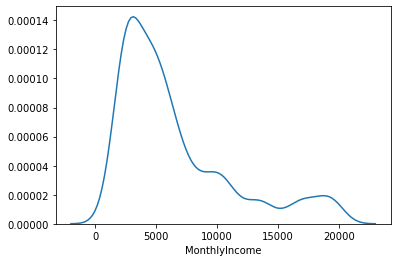

In [ ]:
#MonthlyIncome
sns.distplot(empdf['MonthlyIncome'],hist=False)
plt.show()

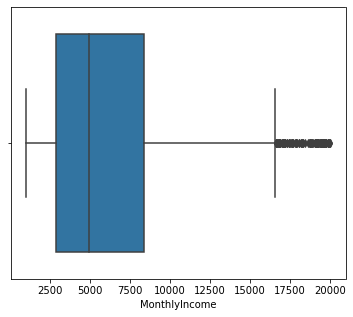

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(empdf['MonthlyIncome'])
plt.show()

In [ ]:
# employee count in age group and whicg age employees are more
empdf.groupby('Age')['EmployeeCount'].sum().sort_values(ascending=False).head()

Age
35    78
34    77
31    69
36    69
29    68
Name: EmployeeCount, dtype: int64

In [ ]:
#JobLevel
empdf['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

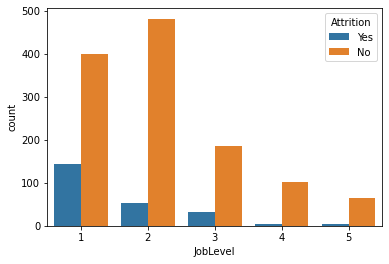

In [ ]:
# JobLevel can have some effect on Attrition of Employees
sns.countplot(x='JobLevel',hue='Attrition',data=empdf)
plt.show()

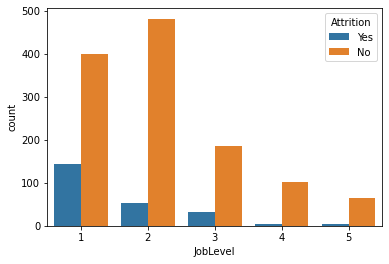

In [ ]:
#NumCompaniesWorked
sns.countplot(x='JobLevel',hue='Attrition',data=empdf)
plt.show()

In [ ]:
empdf['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [ ]:
#drop the columns which have save val in whole dataset or which are unrelevant for Attrition prediction. 
empdf.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis=1, inplace=True)

## Categorical Encoding

In [ ]:
empdf[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
# Target Variable(Attrition)
empdf['Attrition'] = empdf['Attrition'].replace({'No':0,'Yes':1})

In [ ]:
#encode binary variables
empdf['OverTime'] = empdf['OverTime'].map({'No':0,'Yes':1})
empdf['Gender'] = empdf['Gender'].map({'Male':0,'Female':1})

In [ ]:
#encode categorical columns which are ordinal, use labelEncoding
cat_cols = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for col in cat_cols:
    map_dict = {k:i for i, k in enumerate(empdf[col].value_counts().index,0)}
    empdf[col] = empdf[col].map(map_dict)

In [ ]:
# drop the Over18 column
empdf.drop('Over18',axis=1,inplace=True)

### Making a Corelation

In [ ]:
empdf.corr()['Attrition'][:-1].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
Department                  0.077351
EducationField              0.062320
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
MaritalStatus               0.011195
PerformanceRating           0.002889
BusinessTravel             -0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
JobRole                    -0.027930
Gender                     -0.029453
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
Age                        -0.159205
MonthlyIncome              -0.159840
Y

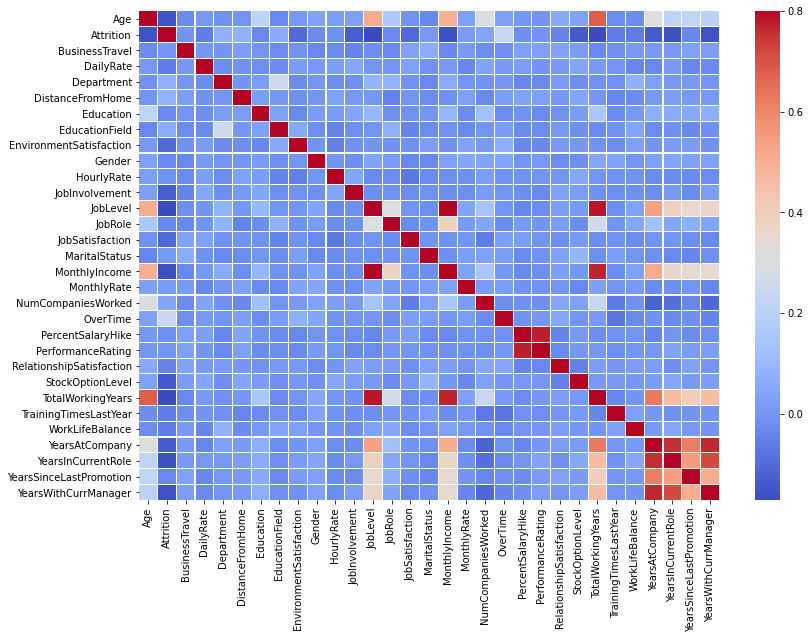

In [ ]:
plt.figure(figsize=(13,9))
sns.heatmap(empdf.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

In [ ]:
empdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,1,1,2,0,2,1,94,3,2,0,4,1,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,0,8,1,0,3,0,61,2,2,1,2,0,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,0,1373,0,2,2,4,4,0,92,2,1,2,3,1,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,0,3,4,0,4,1,56,3,1,1,3,0,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,0,591,0,2,1,1,1,0,40,3,1,2,2,0,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


## FeatureSelection

In [ ]:
x = empdf.drop('Attrition',axis=1)
y = empdf['Attrition']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier()

extra_tree.fit(x,y)

feat_importance = extra_tree.feature_importances_

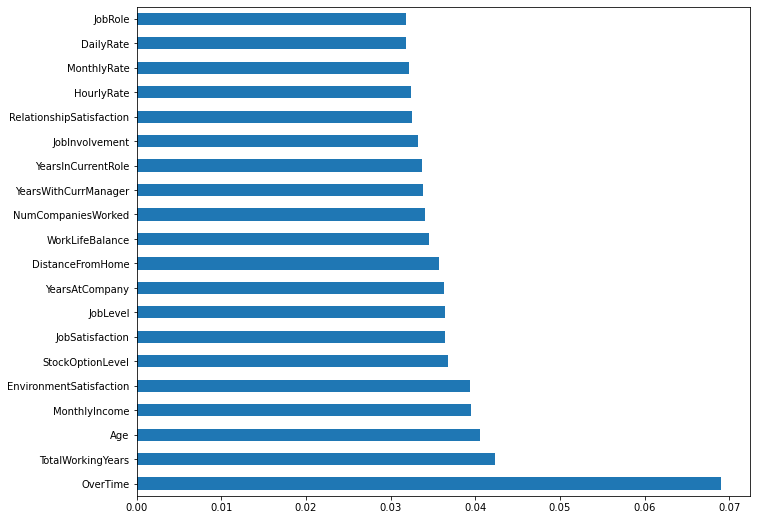

In [ ]:
#plotting a feature importance
plt.figure(figsize=(11,9))
feat_imp = pd.Series(extra_tree.feature_importances_, index=x.columns)

feat_imp.nlargest(20).plot(kind='barh')
plt.show()

**OBSERVATIONS:** ****Factors Responsible for Employee Attrition****

- OverTime has highest relationship with Attrition, Employee who do OverTime, changes or leaves the Job early. we have seen this above also during categorical variable analysis.
- Age is 2nd factor responsible, it can be that who are senior, are retiring or the employees who are bachelor has more expectations more organization.
- MonthlyIncome is also a greatest factor for employee to Attritate
- StockOptionLevel, we have seen can be determing factor, because employees are in chance that they should be given priority and power and consider to have involvement to buy Company stocks.
- EnvironmentSatisfaction, JobSatisfaction, DistanceFromHome, WorkLifeBalance, JobLevel is at same level affects equally to the organization employees base.

### Feature Selection with Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

x_scaled = min_max.fit(x).transform(x)

In [ ]:
ExtraTree = ExtraTreesClassifier()

ExtraTree.fit(x_scaled, y)

feature_importance = pd.Series(ExtraTree.feature_importances_, index=x.columns)
feature_importance

Age                         0.042077
BusinessTravel              0.024245
DailyRate                   0.030778
Department                  0.022886
DistanceFromHome            0.036665
Education                   0.027269
EducationField              0.030718
EnvironmentSatisfaction     0.040646
Gender                      0.021108
HourlyRate                  0.032182
JobInvolvement              0.033192
JobLevel                    0.035605
JobRole                     0.031268
JobSatisfaction             0.037526
MaritalStatus               0.026702
MonthlyIncome               0.044151
MonthlyRate                 0.031825
NumCompaniesWorked          0.031300
OverTime                    0.066854
PercentSalaryHike           0.030019
PerformanceRating           0.013645
RelationshipSatisfaction    0.032518
StockOptionLevel            0.038713
TotalWorkingYears           0.040938
TrainingTimesLastYear       0.029355
WorkLifeBalance             0.034646
YearsAtCompany              0.035716
Y

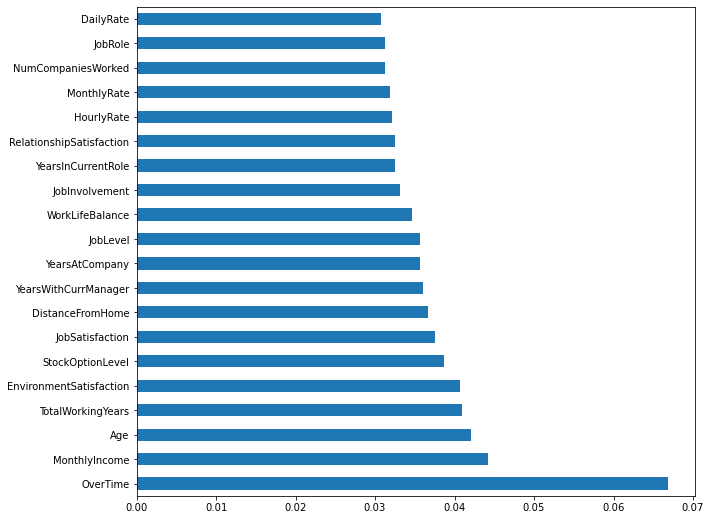

In [ ]:
plt.figure(figsize=(10,9))
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

- Only a little bit of changed occured due to scaling the features that, can be proved strong from modelling part.

## Modelling

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#split data into train and test set.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training shape: ",x_train.shape)
print("testing shape: ",x_test.shape)

training shape:  (1102, 30)
testing shape:  (368, 30)


In [ ]:
#models
log_clf = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

In [ ]:
# first check the accuracy score on without scalled features
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf]:
    clf.fit(x_train, y_train)
    
    pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.8722826086956522
SVC   0.8695652173913043
KNeighborsClassifier   0.8396739130434783
DecisionTreeClassifier   0.8070652173913043
RandomForestClassifier   0.875


In [ ]:
# let's try out VotingClassifier
from sklearn.ensemble import VotingClassifier

voting_clf =VotingClassifier([('lgclf',log_clf),('svc',svc_clf),('knn',knn_clf),('dt',dt_clf),('rf',rf_clf)])

voting_clf.fit(x_train,y_train)

y_pred = voting_clf.predict(x_test)
print("acuracy: ",accuracy_score(y_test,y_pred))

acuracy:  0.8722826086956522


In [ ]:
# if we do same thing on scaled features
#split data into train and test set using scaled data.
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y,test_size=0.25,random_state=42)
print("training shape: ",x_train_scaled.shape)
print("testing shape: ",x_test_scaled.shape)

training shape:  (1102, 30)
testing shape:  (368, 30)


In [ ]:
# Now check the accuracy score on scalled features
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf]:
    clf.fit(x_train_scaled, y_train_scaled)
    
    pred = clf.predict(x_test_scaled)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.904891304347826
SVC   0.8831521739130435
KNeighborsClassifier   0.875
DecisionTreeClassifier   0.7907608695652174
RandomForestClassifier   0.875


In [ ]:
# try votingClf with scaled data

voting_clf =VotingClassifier([('lgclf',log_clf),('svc',svc_clf),('knn',knn_clf),('dt',dt_clf),('rf',rf_clf)])

voting_clf.fit(x_train_scaled,y_train_scaled)

y_pred = voting_clf.predict(x_test_scaled)
print("acuracy: ",accuracy_score(y_test_scaled,y_pred))

acuracy:  0.8913043478260869


**This is reason why Feature Scaling is used. by scaling down the features we are able to achieve better accuracy**

**ADABOOST:** Adaboost is a boosting algoritm, which works on concept of errror correction using the concept of SAMME(Stagwise Adaptive Multimodelling using Multiclass exponential loss function) algorithm. It works sequentially by building a sequential model that works on a error generated by previous model. Repeatedly it do this process untill iterations are over of error becomes 0. Thus, it exploits the dependency between the models and different from Bagging(RandomForest).

**XGBoost:** Xgboost is an extension to GBM, for better speed and performance. It is trained in additive manner. It prevents the overfitting, and outliers. for xgboost we also no need to impute missing values, it takes care of that too.  

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=500, algorithm='SAMME',learning_rate=0.01)

boost.fit(x_train_scaled,y_train_scaled)

predictions = boost.predict(x_test_scaled)

print("accuracy:",accuracy_score(y_test,predictions))

accuracy: 0.8722826086956522


In [ ]:
#training accuracy
print("training accuracy:",boost.score(x_train_scaled,y_train_scaled))
print("testing accuracy:",boost.score(x_test_scaled,y_test_scaled))

training accuracy: 0.837568058076225
testing accuracy: 0.8722826086956522


In [ ]:
# XGBOOST
xgb = XGBClassifier()

xgb.fit(x_train_scaled, y_train_scaled)

prediction = xgb.predict(x_test_scaled)

print("accuracy: ",accuracy_score(y_test,prediction))

accuracy:  0.8804347826086957


## Hyperparameter(Performance) Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
# let's first try hyperparameter tuning with RandomForest

#number of trees in forest
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
#max depth of tree
max_depth = [int(x) for x in np.linspace(5,30,6)]
#quality of split
criterion = ['gini','entropy']
#min no. of samples to consider for splitting a internal node
min_samples_split = [2,5,7,10]
#min number of node can be as leaf node
min_samples_leaf = [2,5,8]
# The number of features to consider when looking for the best split:
max_features = ["auto","sqrt"]

random_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion,
                  min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,
                   max_features=max_features)
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 7, 10], 'min_samples_leaf': [2, 5, 8], 'max_features': ['auto', 'sqrt']}


In [ ]:
rf_clf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf_clf, param_distributions=random_grid, cv=5, n_iter=10,
                               random_state=42, n_jobs=-1,verbose=1,)

rf_random.fit(x_train_scaled, y_train_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   44.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 8],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=1)

In [ ]:
print(rf_random.best_score_)
print(rf_random.best_params_)

0.8538831756478815
{'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30, 'criterion': 'entropy'}


In [ ]:
# hyperparameter tuning for XgBoost

n_estimators = [int(x) for x in np.linspace(100,1000,10)]

max_depth = [int(x) for x in np.linspace(6,30,5)]
learning_rate = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]
min_child_weight = list(range(1,10))

xg_grid = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, 
               min_child_weight=min_child_weight)
print(xg_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [6, 12, 18, 24, 30], 'learning_rate': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [ ]:
xgb = XGBClassifier()
xgb_random = RandomizedSearchCV(xgb, param_distributions=xg_grid, cv=5, random_state=42,
                               n_iter=10,scoring="accuracy",n_jobs=-1,verbose=1)

xgb_random.fit(x_train_scaled,y_train_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.1s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [ ]:
print("score: ",xgb_random.best_score_)
print("best_params: \n",xgb_random.best_params_)

score:  0.8629452900041136
best_params: 
 {'n_estimators': 600, 'min_child_weight': 7, 'max_depth': 24, 'learning_rate': 0.004}


### **If you like this Notebook, Please Upvote. It gives motivation for making a new notebooks and positively move ahead with a Data science journey**

**Thank You!..** 